In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import scipy as sci




In [386]:
delta_t=1/12 #discretização mensal
y0=1000 # valor inicial anual
kappa=0.7 # fator de reversão anual
y_barra=1000 # Média de reversão
sigma=0.10 #volatilidade anual
T=5  #anos
num=4 #numero de simulações

In [387]:
def reversao(P0,eta,alpha,sigma,T,delta_t,num):
    Po=P0
    serie=[]
    Tempo=[]
    serie.append(Po)
    Tempo.append(0)
    for t in range(int(T/delta_t)):
        P1=np.exp(np.log(P0)*np.exp(-eta*((t+1)*delta_t)) + (alpha- (sigma**2/(2*eta)))*(1-np.exp(-eta*((t+1)*delta_t))))
        serie.append(P1)
        Tempo.append((t+1)*delta_t)
    df=pd.DataFrame(serie)
    
    for i in range(len(Tempo)):
        Tempo[i] == round(i,0) #tries to round all numbers.
        
    df.index=Tempo
    df.columns=['P_Media']
    
    
    for i in range(num):
        Po=P0
        serie=[]
        serie.append(Po)
        for t in range(int(T/delta_t)):
            #P1=Po*np.exp( (eta*(alpha- np.log(Po))-0.5*np.power(sigma,2))*delta_t + sigma*np.random.normal(0,1)*np.sqrt(delta_t))
            P1=np.exp(np.log(Po)*np.exp(-eta*delta_t) + (alpha -1*(sigma**2)/(2*eta))*(1-np.exp(-eta*delta_t))+ sigma*np.random.normal(0,1)*np.sqrt((1-np.exp(-2*eta*delta_t))/(2*eta))    )
            serie.append(P1)
            Po=P1
        df['P_{}'.format(i)]=serie
        
    return[df.plot(legend=False),df.P_Media.plot(color='black', legend=True)]

In [388]:
print('reverte meia vida em:', -np.log(0.5)/kappa, 'ano(s)')
print('volatilidade mensal é:', 100*sigma*delta_t**.5, '%a.m')

reverte meia vida em: 0.9902102579427791 ano(s)
volatilidade mensal é: 2.8867513459481287 %a.m


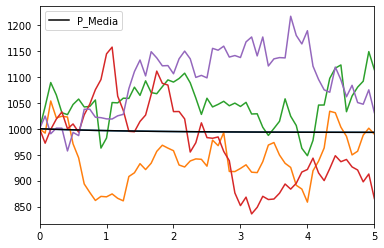

In [389]:
reversao=reversao(y0,kappa,np.log(y_barra),sigma,T,delta_t,num)

In [415]:
Inv=3*yo #investiment igual 4 vezes a receita
taxa=0.6 #custo do capital anual
custo=800 #custo mensal
IR=0.35



In [416]:
###Funcao da Simulacao de Monte Carlo####
def simulacao(i,P0,eta,alpha,sigma,T,delta_t,Inv,taxa,custo,IR,prob):
    np.random.seed(20)
    v_mc=[]
    simul=[]
    for i in range(i):
        inv=Inv/3
        inv= inv*np.exp(-1*taxa) + inv*np.exp(-2*taxa) + inv*np.exp(-3*taxa)
        simul.append(-inv)
        
        Po=P0
        serie=[]
        serie.append(Po)
        for t in range(int(T/delta_t)):
            #P1=Po*np.exp( (eta*(alpha- np.log(Po))-0.5*np.power(sigma,2))*delta_t + sigma*np.random.normal(0,1)*np.sqrt(delta_t))
            P1=np.exp(np.log(Po)*np.exp(-eta*delta_t) + (alpha -1*(sigma**2)/(2*eta))*(1-np.exp(-eta*delta_t))+ sigma*np.random.normal(0,1)*np.sqrt((1-np.exp(-2*eta*delta_t))/(2*eta))    )
            serie.append(P1)
            Po=P1
            
            margem=(Po-custo)*(1-IR)
            margem=prob*margem
            simul.append(margem*(-t*delta_t*taxa))
        
        
        v_mc.append(sum(simul))
        simul=[]
        
        
        
    
    return v_mc


In [428]:
resultado=simulacao(100000,y0,kappa,np.log(y_barra),sigma,T,delta_t,Inv,taxa,custo,IR,1)

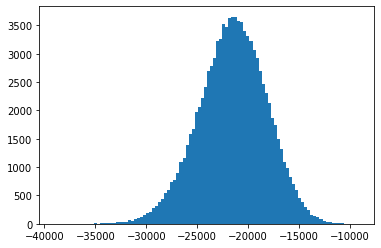

In [429]:
plt.hist(resultado, bins=100);

In [430]:
np.mean(resultado)

-21514.544965188255

In [431]:
def VPL(P0,eta,alpha,sigma,T,delta_t,Inv,taxa,custo,IR,prob):
    vpl=[]
    inv=Inv/3
    inv= inv*np.exp(-1*taxa) + inv*np.exp(-2*taxa) + inv*np.exp(-3*taxa)
    vpl.append(-inv)
    
    Po=P0
    serie=[]
    Tempo=[]
    serie.append(Po)
    Tempo.append(0)
    for t in range(int(T/delta_t)):
        P1=np.exp(np.log(P0)*np.exp(-eta*((t+1)*delta_t)) + (alpha- (sigma**2/(2*eta)))*(1-np.exp(-eta*((t+1)*delta_t))))
        margem=(P1-custo)*(1-IR)
        margem=prob*margem
        vpl.append(margem*(-t*delta_t*taxa))
        
        
        
    return sum(vpl)
        
        

In [432]:
VPL(y0,kappa,np.log(y_barra),sigma,T,delta_t,Inv,taxa,custo,IR,1)

-21303.670258411417